# Tarea 7

**Alumna:** Sofía Castro Varona

**Fecha de entrega:** Miércoles 25 de mayo del 2022


**Instrucciones:** El código de la solución a los enunciados de esta tarea debe de escribirse usando jupyter notebook. Debes entregar la tarea en formato HTML y en ipynb en la platafoma de classroom. Además, debes comentar que acción, operación y/o proceso están realizando las líneas del código solución.

1.- En el ejercicio resuelto en clase (16-05-2022) se encontró un polinomio interpolador usando el método de Newton para el siguiente conjunto de  puntos $data= \{(-5,-2),(-1,6),(0,1),(2,3)\}$.  Escriba el código para el caso general en que se quiere interpolar $n$ puntos. Para ello recuerde que:

$
f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\cdots +a_n(x-x_0)(x-x_1)\cdots (x-x_n)
$

puede expresarse como:

$f(x)=\sum_{i=0}^{n} a_in_i(x)$

donde 

$n_i(x)=\prod_{j=0}^{i-1}(x-x_j)$

Entonces primero defina una función $n\text{_}i(x\text{_}data,x\text{_}new)$, luego encuentre la matriz de coeficientes $coef$ y después defina una función $newton\text{_}poly(coef,x\text{_}data,x\text{_}new)$ que construya de forma iterativa el polinomio de newton (**Hint:** usa el controlador de flujo *while*). Pruebe con el conjunto de puntos $data= \{(-5,-2),(-1,6),(0,1),(2,3),(3,5)\}$.


2.- Retomando el ejercicio resuelto en clase para interpolacion en 2D usando la función *interpolate.griddata*, compare el resultado de interpolar con los métodos $nearest, linear$ y $cubic$, considerando $50,150,\text{ y }500$ puntos a interpolar, recuerde que deben estar distribuidos aleatoriamente. Grafique los resultados anteriores, debes obtener algo smilar a la siguiente imagen.

<img src = "Newton_methods.jpg"  width="800" height="200"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

**Ejercicio 1**

In [2]:
#Estos son nuestros puntos para comprobar nuestra interpolación
x_data = np.array([-5,-1,0,2,3])
y_data = np.array([-2,6,1,3,5])
x_new = np.arange(x_data[0],x_data[-1]+.1,.1)

In [3]:
def divided_dif(x,y): #matriz de los coeficientes
    n = len(y) #longitud de nuestros puntos
    coef = np.zeros([n,n]) #longitud de la matriz con base a y e inicialmente llenada con 0
    coef[:,0]= y #la primera columna está llenada con las coordenadas de y 
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i]) #calcula los coeficientes de una fila y columna anterior
    return coef

In [4]:
coef = divided_dif(x_data,y_data) #corroboramos la matriz
coef

array([[-2.        ,  2.        , -1.4       ,  0.48571429, -0.11279762],
       [ 6.        , -5.        ,  2.        , -0.41666667,  0.        ],
       [ 1.        ,  1.        ,  0.33333333,  0.        ,  0.        ],
       [ 3.        ,  2.        ,  0.        ,  0.        ,  0.        ],
       [ 5.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [5]:
def n_i(x_data, x_new):#función del productorio donde a los coeficientes se les multiplica (x - x0)
    
    n = len(y_data) #longitud de nuestros puntos
    coef2 = np.zeros([n]) #longitud de la matriz con base a y e inicialmente llenada con 0
    coef2[0] = 1 #primer vector
    coef2[1] = (x_new - x_data[0]) #segundo vector con x_new restado el vector anterior

    i = 1
    p1 = (x_new-x_data[0]) #p1 es el primer producto
    
    while i <= n-2:  #en un principio tenemos n = 5 y al ya tener los 2 primeros puntos
                      #solo tenemos que calcular los 3 restantes
    
        p1*= (x_new - x_data[i]) #se realiza el productorio
        coef2[i+1]= p1 #avanzamos la columna de la matriz
        i += 1 
    return(coef2)  

In [6]:
m_i = len(coef) #longitud de nuestra matriz inicial
m_s = np.ones([m_i]) #nuestra matriz secundaria se llena de 1 con respecto al total de coeficientes

m_s[0]=coef[0][0] #primer punto con primera coordenada de coef
m_s[1]=(coef[0][1]) #segundo punto con segunda coordenada de coef

j = 1 
seg_coo = coef[0][1]

while j <= m_i-2:#en un principio tenemos n = 5 y al ya tener los 2 primeros puntos
                 #solo tenemos que calcular los 3 restantes
        
    seg_coo = (coef[0][j+1]) #avanza en la horizontal
    m_s[j+1]= seg_coo #se llena de los coeficientes
    j+=1

In [7]:
def newton_pol(coef,x_data,x_new):
    y_f = np.zeros(len(x_new))
    i = 0
    while i <= len(x_new)-1: #la posicion 0 es el primer valor
        suma_total = sum(m_s*n_i(x_data,x_new[i])) #suma total de los coeficientes con (x - x0)
        y_f[i]= suma_total 
        i += 1
    return y_f

In [8]:
y_ff = np.zeros(len(x_new))
ii = 0
while ii <= len(x_new)-1:
    suma_total2 = sum(m_s*n_i(x_data,x_new[ii]))
    y_ff[ii]= suma_total2   
    ii += 1

Text(0.5, 1.0, 'Polinomio de Newton')

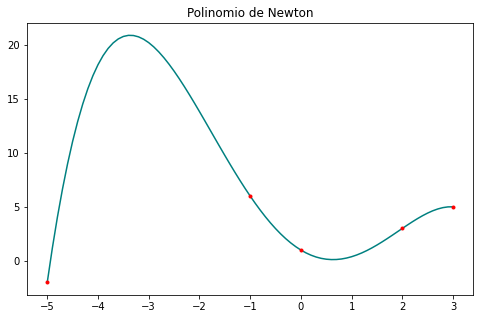

In [9]:
plt.figure(figsize=(8,5))
plt.plot(x_new, y_ff, color = 'teal')
plt.plot(x_data,y_data,"r.")
plt.title("Polinomio de Newton") #,fontdict={'family':'serif','color':'pink', 'size':19})

**Ejercicio 2**

Sea nuestra función

$
f(x,y)=exp(-x^2 - y^2) cos(4x)
sen(6y)
$

In [10]:
def f(x,y):
    return np.exp(-x**2-y**2)*np.cos(4*x)*np.sin(6*y)

Empecemos con n = 50

In [11]:
#Estos son nuestros puntos a interpolar distribuidos aleatoriamente 
N = 50
x_dta50= np.random.uniform(-1,1,N)
y_dta50 = np.random.uniform(-1,1,N)
z_dta50 = f(x_dta50,y_dta50)

In [12]:
#Estos son nuestras coordenadas para la función analítica
x = y =np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)

In [13]:
#Estructuras a interpolar para los diferentes métodos con n = 50
Zi50N = interpolate.griddata((x_dta50,y_dta50),z_dta50,(X,Y),method = "nearest")
Zi50L = interpolate.griddata((x_dta50,y_dta50),z_dta50,(X,Y),method = "linear")
Zi50C = interpolate.griddata((x_dta50,y_dta50),z_dta50,(X,Y),method = "cubic")

Continuamos con n = 150

In [14]:
N = 150
x_dta150= np.random.uniform(-1,1,N)
y_dta150 = np.random.uniform(-1,1,N)
z_dta150 = f(x_dta150,y_dta150)

In [15]:
Zi150N = interpolate.griddata((x_dta150,y_dta150),z_dta150,(X,Y),method = "nearest")
Zi150L = interpolate.griddata((x_dta150,y_dta150),z_dta150,(X,Y),method = "linear")
Zi150C = interpolate.griddata((x_dta150,y_dta150),z_dta150,(X,Y),method = "cubic")

Finalizamos con n = 500 

In [16]:
N = 500
x_dta500= np.random.uniform(-1,1,N)
y_dta500 = np.random.uniform(-1,1,N)
z_dta500 = f(x_dta500,y_dta500)

In [17]:
Zi500N = interpolate.griddata((x_dta500,y_dta500),z_dta500,(X,Y),method = "nearest")
Zi500L = interpolate.griddata((x_dta500,y_dta500),z_dta500,(X,Y),method = "linear")
Zi500C = interpolate.griddata((x_dta500,y_dta500),z_dta500,(X,Y),method = "cubic")

Graficamos las 6 interpolaciones 

Text(0.5, 1.0, 'Método cubic')

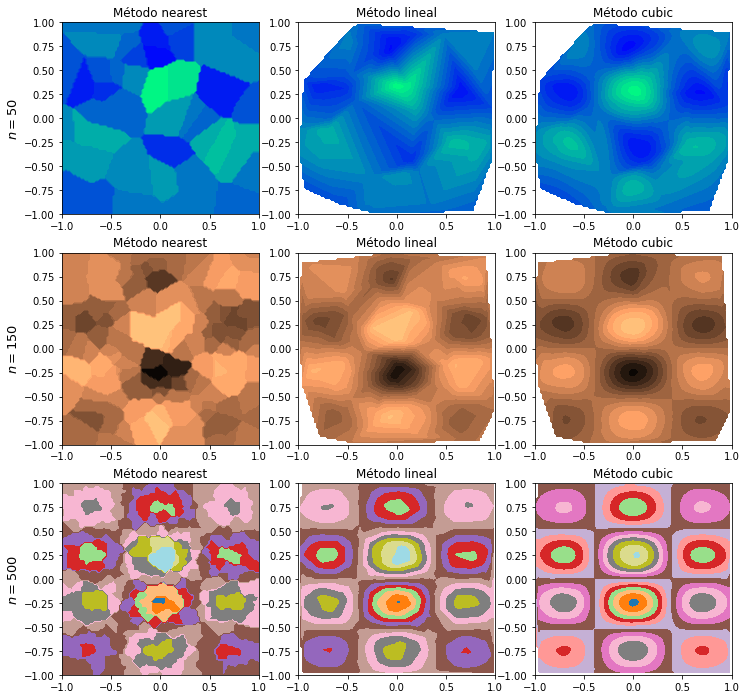

In [18]:
fig, axes  = plt.subplots(3,3,figsize = (12,12)) #El 3,3 significa 3 filas y 3 columnas
axes[0][0].set_ylabel("$n = 50$", fontsize = 13) #[0][0] significa fila 1 columna 1
axes[1][0].set_ylabel("$n = 150$", fontsize = 13) #[1][0] significa fila 2 columna 1
axes[2][0].set_ylabel("$n = 500$", fontsize = 13)  #[2][0] significa fila 3 columna 1

c =  axes[0][0].contourf(X,Y,Zi50N,15,cmap="winter") #[0][0] significa fila 1 columna 1
axes[0][0].set_title("Método nearest")

c =  axes[0][1].contourf(X,Y,Zi50L,15,cmap="winter") #[0][1] significa fila 1 columna 2
axes[0][1].set_title("Método lineal")

c =  axes[0][2].contourf(X,Y,Zi50C,15,cmap="winter") #[0][1] significa fila 1 columna 3
axes[0][2].set_title("Método cubic")

c =  axes[1][0].contourf(X,Y,Zi150N,15,cmap="copper") #[1][0] significa fila 2 columna 1
axes[1][0].set_title("Método nearest")

c =  axes[1][1].contourf(X,Y,Zi150L,15,cmap="copper") #[1][1] significa fila 2 columna 2
axes[1][1].set_title("Método lineal")

c =  axes[1][2].contourf(X,Y,Zi150C,15,cmap="copper") #[1][1] significa fila 2 columna 3
axes[1][2].set_title("Método cubic")

c =  axes[2][0].contourf(X,Y,Zi500N,15,cmap="tab20") #[2][0] significa fila 3 columna 1
axes[2][0].set_title("Método nearest")

c =  axes[2][1].contourf(X,Y,Zi500L,15,cmap="tab20") #[2][1] significa fila 3 columna 2
axes[2][1].set_title("Método lineal")

c =  axes[2][2].contourf(X,Y,Zi500C,15,cmap="tab20") #[2][2] significa fila 3 columna 3
axes[2][2].set_title("Método cubic")